# Hurricane Sandy F-17 SSMIS Analysis

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from netCDF4 import Dataset 
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader

[u'Reflectivity', u'lat', u'lon', u'time']
Z shape (1036, 1560) [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Z min, Z max nan nan
lat shape, lon shape (1036,) (1560,)
Z shape (1036, 1560) [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Z_35 shape (1036, 1560)
Z_40 shape (1036, 1560)
lats shape, lons shape (1036, 1560) (1036, 1560) [[35.09038444 35.09038444 35.09038444 ... 35.09038444 35.09038444
  35.09038444]
 [35.09788961 35.09788961 35.09788961 ... 35.09788961 35.09788961
  35.09788961]
 [35.10539478 35.10539478 35.10539478 ... 35.10539478 35.10539478
  35.10539478]
 ...
 [42.84322526 42.84322526 42.84322526 ... 42.84322526 42.84322526
  42.84322526]
 [42.85073043 42.85073043 42.85073043 ... 42.85

c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less
c:\programdata\anaconda2\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less


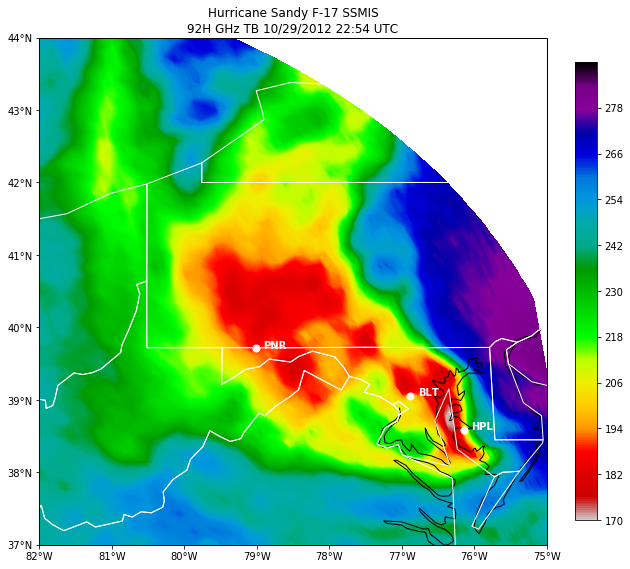

In [2]:
def read_SSMIS_plot_H(ncf):
    nc_fid = Dataset(ncf, 'r')
    BT = nc_fid.variables["fcdr_brightness_temperature_92H"][:]  # shape lat, lon as shown above
    lats = nc_fid.variables['latitude_hires'][:]  # extract/copy the data
    lons = nc_fid.variables['longitude_hires'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return BT, lats, lons, names

def read_SSMIS_plot_V(ncf):
    nc_fid = Dataset(ncf, 'r')
    BT = nc_fid.variables["fcdr_brightness_temperature_92V"][:]  # shape lat, lon as shown above
    lats = nc_fid.variables['latitude_hires'][:]  # extract/copy the data
    lons = nc_fid.variables['longitude_hires'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return BT, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    Z = nc_fid.variables["Reflectivity"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return Z, lat, lon, names

Z_file = 'KLWX_V06_20121029_225632.nc'
Z, lat, lon, names = read_radar_plot(Z_file)
Z = Z[0,:,:]
print(names)
print('Z shape', Z.shape, Z)
Z_max = np.amax(Z)
Z_min = np.amin(Z)
print('Z min, Z max', Z_min, Z_max)
print('lat shape, lon shape', lat.shape, lon.shape)

Z[Z>60]=59
print('Z shape', Z.shape, Z)

Z_35 = ma.masked_where(Z < 35, Z)
print('Z_35 shape', Z_35.shape)

Z_40 = ma.masked_where(Z < 40, Z)
print('Z_40 shape', Z_40.shape)

lonz,latz = np.meshgrid(lon,lat)
print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)

SSMIS_file = 'RSS_SSMIS_FCDR_V07R00_F17_D20121029_S2216_E0008_R30884.nc'
BT_2216H, lats, lons, names = read_SSMIS_plot_H(SSMIS_file)
BT_2216H = BT_2216H[1000:1300,:]
lats = lats[1000:1300,:]
lons = lons[1000:1300,:]
BT_2216Hmn = np.mean(BT_2216H)
lats_mn = np.mean(lats)
lons_mn = np.mean(lons)
print("BT mean = ", BT_2216Hmn)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
BT_max = np.amax(BT_2216H)
BT_min = np.amin(BT_2216H)
print("BT max =", BT_max)
print("BT min =", BT_min)
print("BT_2216H = ", BT_2216H, BT_2216H.shape)
print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape)

fig = plt.figure(figsize=(10, 10))
img_extent = (-82, -75, 37, 44)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-82, -75, 37, 44], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('Hurricane Sandy F-17 SSMIS\n'
          '92H GHz TB 10/29/2012 22:54 UTC')
Tlevels = np.arange(170,290,0.1)
mi = ax.contourf(lons, lats, BT_2216H, Tlevels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.coastlines(resolution='50m', color='black', linewidth=1)
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'white'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
ax.set_xticks([-82,-81,-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41,42,43,44])

ax.plot(-76.88, 39.06, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.78, 39.06, 'BLT', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.14, 38.59, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.04, 38.59, 'HPL', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-79.01, 39.71, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-78.91, 39.71, 'PNR', color='white', weight='bold', transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.041,pad=0.05)
plt.savefig("F17_ssmis_92HBT_2254.png",dpi=250,bbox_inches='tight')
plt.show()

BT mean =  265.59292592592595
Lats mean=  26.394569444444443
Lons mean=  -81.23332407407408
BT max = 292.22
BT min = 138.98999
BT_2216V =  [[287.41998291015625 288.97998046875 287.8599853515625 ...
  253.38999938964844 278.5099792480469 278.3299865722656]
 [286.989990234375 288.5799865722656 287.54998779296875 ...
  224.239990234375 250.55999755859375 280.07000732421875]
 [288.1300048828125 288.2799987792969 287.30999755859375 ...
  270.8899841308594 219.37998962402344 251.45999145507812]
 ...
 [280.0299987792969 279.57000732421875 279.8299865722656 ...
  272.0199890136719 272.0799865722656 272.72998046875]
 [278.5 277.69000244140625 278.7900085449219 ... 273.0400085449219
  272.3699951171875 270.7200012207031]
 [279.1099853515625 278.1999816894531 278.7099914550781 ...
  272.32000732421875 272.3999938964844 272.1499938964844]] (300, 180)
Lats =  [[7.399999618530273 7.5 7.599999904632568 ... 5.460000038146973
  5.349999904632568 5.239999771118164]
 [7.509999752044678 7.609999656677246 

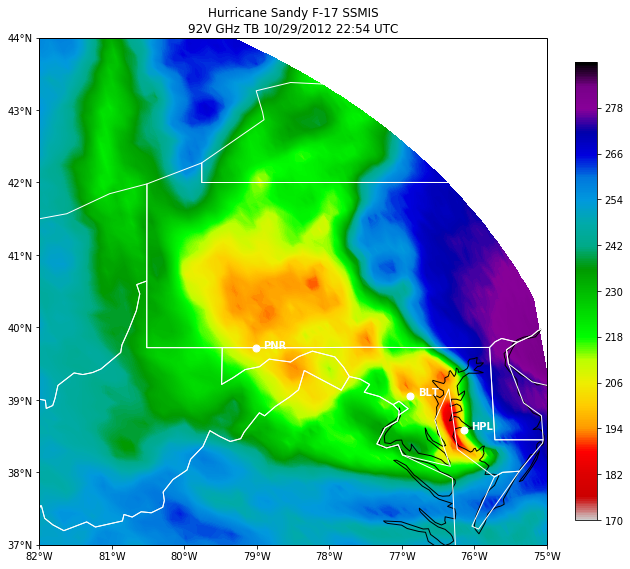

In [3]:
SSMIS_file = 'RSS_SSMIS_FCDR_V07R00_F17_D20121029_S2216_E0008_R30884.nc'
BT_2216V, lats, lons, names = read_SSMIS_plot_V(SSMIS_file)
BT_2216V = BT_2216V[1000:1300,:]
lats = lats[1000:1300,:]
lons = lons[1000:1300,:]
BT_2216Vmn = np.mean(BT_2216V)
lats_mn = np.mean(lats)
lons_mn = np.mean(lons)
print("BT mean = ", BT_2216Vmn)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
BT_max = np.amax(BT_2216V)
BT_min = np.amin(BT_2216V)
print("BT max =", BT_max)
print("BT min =", BT_min)
print("BT_2216V = ", BT_2216V, BT_2216V.shape)
print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape)

fig = plt.figure(figsize=(10, 10))
img_extent = (-82, -75, 37, 44)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-82, -75, 37, 44], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('Hurricane Sandy F-17 SSMIS\n'
          '92V GHz TB 10/29/2012 22:54 UTC')
Tlevels = np.arange(170,290,0.1)
mi = ax.contourf(lons, lats, BT_2216V, Tlevels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.coastlines(resolution='50m', color='black', linewidth=1)
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'white'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
ax.set_xticks([-82,-81,-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41,42,43,44])

ax.plot(-76.88, 39.06, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.78, 39.06, 'BLT', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.14, 38.59, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.04, 38.59, 'HPL', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-79.01, 39.71, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-78.91, 39.71, 'PNR', color='white', weight='bold', transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.041,pad=0.05)
plt.savefig("F17_ssmis_92VBT_2254.png",dpi=250,bbox_inches='tight')
plt.show()

BTD mean =  18.323116898148147
BTD max = 62.54001
BTD min = -3.899994
BTD_2216 =  [[0.92999267578125 -0.110015869140625 0.089996337890625 ...
  2.720001220703125 1.239990234375 1.3699951171875]
 [-0.670013427734375 -0.44000244140625 0.290008544921875 ...
  3.79998779296875 2.5500030517578125 2.420013427734375]
 [1.800018310546875 2.350006103515625 1.720001220703125 ...
  4.839996337890625 5.6699981689453125 3.459991455078125]
 ...
 [-0.489990234375 -0.739990234375 0.589996337890625 ... 3.139984130859375
  2.32000732421875 0.79998779296875]
 [-0.92999267578125 -1.53997802734375 -0.8599853515625 ...
  2.360015869140625 3.910003662109375 2.540008544921875]
 [0.589996337890625 -1.09002685546875 0.399993896484375 ...
  1.279998779296875 1.20001220703125 1.959991455078125]] (300, 180)
BTDR mean =  -0.32903291377314814
BTDR max = 0.059448414
BTDR min = -1.3082446
BTDR =  [[-0.014074981212615967 0.0016532809240743518 -0.001357931294478476 ...
  -0.04687109589576721 -0.01937895454466343 -0.0214

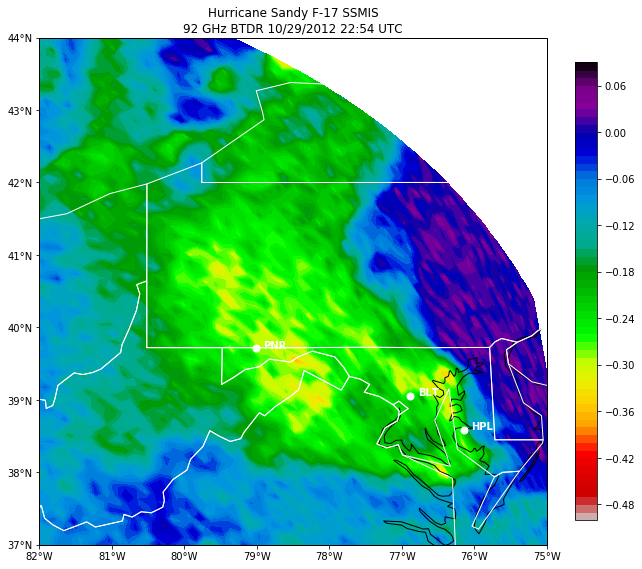

In [4]:
BTD_2216 = BT_2216V - BT_2216H
BTD_2216mn = np.mean(BTD_2216)
print("BTD mean = ", BTD_2216mn)
BTD_max = np.amax(BTD_2216)
BTD_min = np.amin(BTD_2216)
print("BTD max =", BTD_max)
print("BTD min =", BTD_min)
print("BTD_2216 = ", BTD_2216, BTD_2216.shape)

BTDR = 10*(np.log10(BT_2216H/BT_2216V))
BTDRmn = np.mean(BTDR)
print("BTDR mean = ", BTDRmn)
BTDR_max = np.amax(BTDR)
BTDR_min = np.amin(BTDR)
print("BTDR max =", BTDR_max)
print("BTDR min =", BTDR_min)
print("BTDR = ", BTDR, BTDR.shape)

fig = plt.figure(figsize=(10, 10))
img_extent = (-82, -75, 37, 44)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-82, -75, 37, 44], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('Hurricane Sandy F-17 SSMIS\n'
          '92 GHz BTDR 10/29/2012 22:54 UTC')
TDlevels = np.arange(-0.5,0.1,0.01)
mi = ax.contourf(lons, lats, BTDR, TDlevels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
ax.coastlines(resolution='50m', color='black', linewidth=1)
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'white'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
ax.set_xticks([-82,-81,-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41,42,43,44])

ax.plot(-76.88, 39.06, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.78, 39.06, 'BLT', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.14, 38.59, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.04, 38.59, 'HPL', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-79.01, 39.71, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-78.91, 39.71, 'PNR', color='white', weight='bold', transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(mi,fraction=0.041,pad=0.05)
plt.savefig("F17_ssmis_92BTDR_2254.png",dpi=250,bbox_inches='tight')
plt.show()


c:\programdata\anaconda2\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'latlon'
  s)


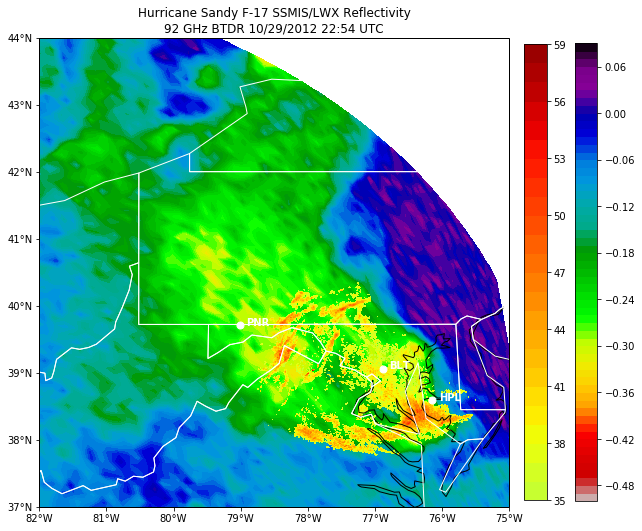

In [5]:
fig = plt.figure(figsize=(10, 10))
img_extent = (-82, -75, 37, 44)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-82, -75, 37, 44], ccrs.PlateCarree(globe=None))
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('Hurricane Sandy F-17 SSMIS/LWX Reflectivity\n'
          '92 GHz BTDR 10/29/2012 22:54 UTC')
TDlevels = np.arange(-0.5,0.1,0.01)
mi = ax.contourf(lons, lats, BTDR, TDlevels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='nipy_spectral_r')
Zlevels = np.arange(35,60,1)
cZ = ax.contourf(lonz,latz,Z_35,Zlevels,latlon=True,cmap=plt.cm.jet,vmin=0,vmax=60)
ax.coastlines(resolution='50m', color='black', linewidth=1)
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'white'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
ax.set_xticks([-82,-81,-80,-79,-78,-77,-76,-75])
ax.set_yticks([37,38,39,40,41,42,43,44])

ax.plot(-76.88, 39.06, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.78, 39.06, 'BLT', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.14, 38.59, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.04, 38.59, 'HPL', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-79.01, 39.71, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-78.91, 39.71, 'PNR', color='white', weight='bold', transform=ccrs.Geodetic())

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(mi,fraction=0.041,pad=0.05)
cbar2=plt.colorbar(cZ,fraction=0.045,pad=0.03)
plt.savefig("F17_ssmis_92BTDR_Z35_2254.png",dpi=250,bbox_inches='tight')
plt.show()
